In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

df = pd.read_excel("TemizlenmisTerminalDatasi/foms11_motorin_300ppb.xlsx")

new_df = df[["CH1", "CH2", "CH3", "CH4"]]


new_df.head()


,CH1,CH2,CH3,CH4
0,153169,228649,285904,299273
1,154205,230146,287768,301277
2,153258,228763,286064,299443
3,340980,267257,376133,356975
4,346926,271954,382510,363242


In [4]:
model = IsolationForest(contamination=0.05, random_state=42)
new_df['anomaly'] = model.fit_predict(new_df)

/Users/fatihozkan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/var/folders/39/15zp5wjs7wq3fwkgthfgz4bc0000gn/T/ipykernel_41720/2467396687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['anomaly'] = model.fit_predict(new_df)


In [5]:
new_df

,CH1,CH2,CH3,CH4,anomaly
0,153169,228649,285904,299273,1
1,154205,230146,287768,301277,1
2,153258,228763,286064,299443,1
3,340980,267257,376133,356975,1
4,346926,271954,382510,363242,1
...,...,...,...,...,...
401,207315,185952,243900,247556,-1
402,209020,186532,244500,239669,-1
403,159530,181544,229420,238154,-1
404,164589,185808,234909,243674,-1


In [7]:
# Aykırı verileri ve normal verileri ayrıştırma
anomalies = new_df[new_df['anomaly'] == -1]
normal = new_df[new_df['anomaly'] == 1]


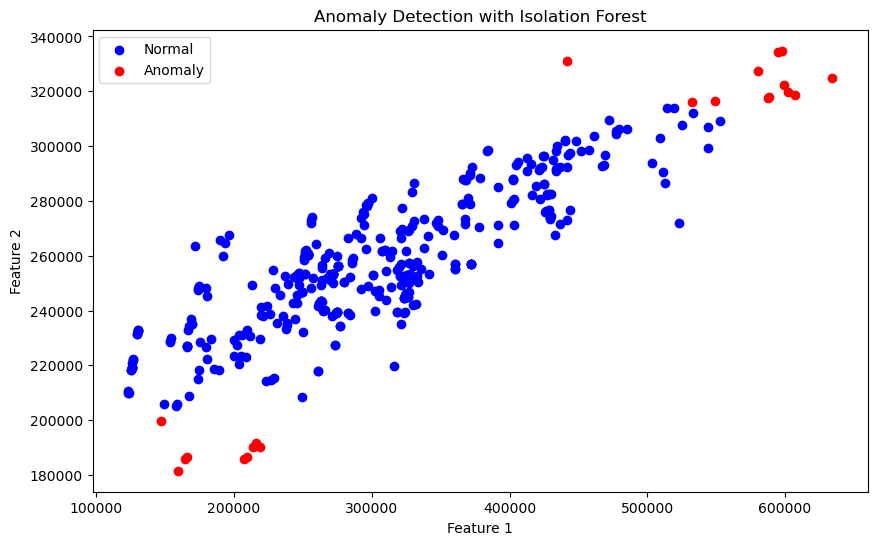

In [9]:
# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))

plt.scatter(normal['CH1'], normal['CH2'], color='blue', label='Normal')
plt.scatter(anomalies['CH1'], anomalies['CH2'], color='red', label='Anomaly')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection with Isolation Forest')
plt.legend()
plt.show()

GMM 

In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("TemizlenmisTerminalDatasi/foms17_benzin_300ppb.xlsx")

df = df[["CH1", "CH2", "CH3", "CH4"]]


df.head()

,CH1,CH2,CH3,CH4
0,184448,81818,116439,132244
1,171277,209464,292491,347776
2,172789,217239,302065,359365
3,238469,218827,311511,364332
4,156626,219462,303978,363289


In [2]:
# Gaussian Mixture Models (GMM) modelinin oluşturulması ve uygulanması
gmm = GaussianMixture(n_components=2, random_state=42)
df['cluster'] = gmm.fit_predict(df)
df

,CH1,CH2,CH3,CH4,cluster
0,184448,81818,116439,132244,0
1,171277,209464,292491,347776,0
2,172789,217239,302065,359365,0
3,238469,218827,311511,364332,0
4,156626,219462,303978,363289,0
...,...,...,...,...,...
248,415640,326965,481344,545036,1
249,481886,327613,484792,544326,1
250,449167,327821,480178,543983,1
251,491054,332945,495566,551815,1


In [3]:
df.cluster.value_counts()

0    184
1     69
Name: cluster, dtype: int64

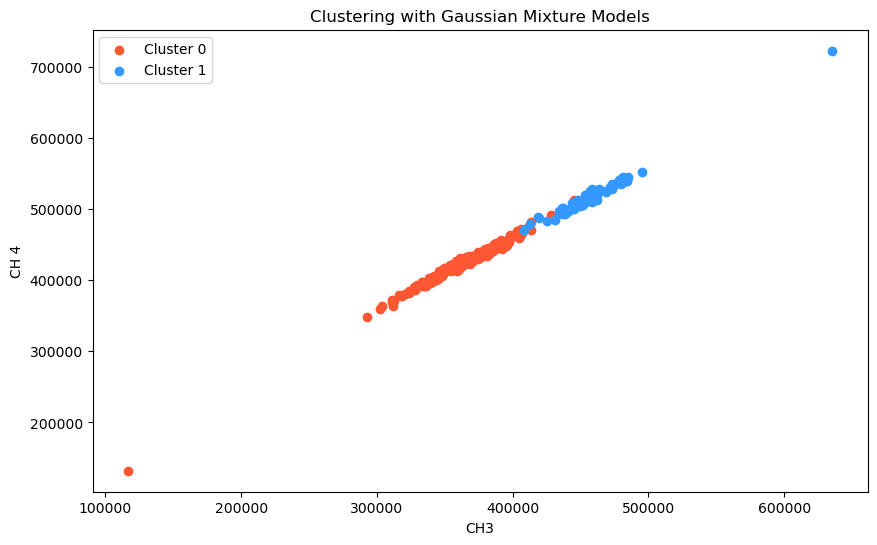

In [4]:
# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
#, '#FFA500', '#800080', '#FFC0CB', '#8B4513', '#808080', '#FFFFFF'
colors = ['#FF5733', '#3399FF']
for cluster in range(2):
    cluster_points = df[df['cluster'] == cluster]
    plt.scatter(cluster_points['CH3'], cluster_points['CH4'], color=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel("CH3" )
plt.ylabel('CH 4')
plt.title('Clustering with Gaussian Mixture Models')
plt.legend()
plt.show()

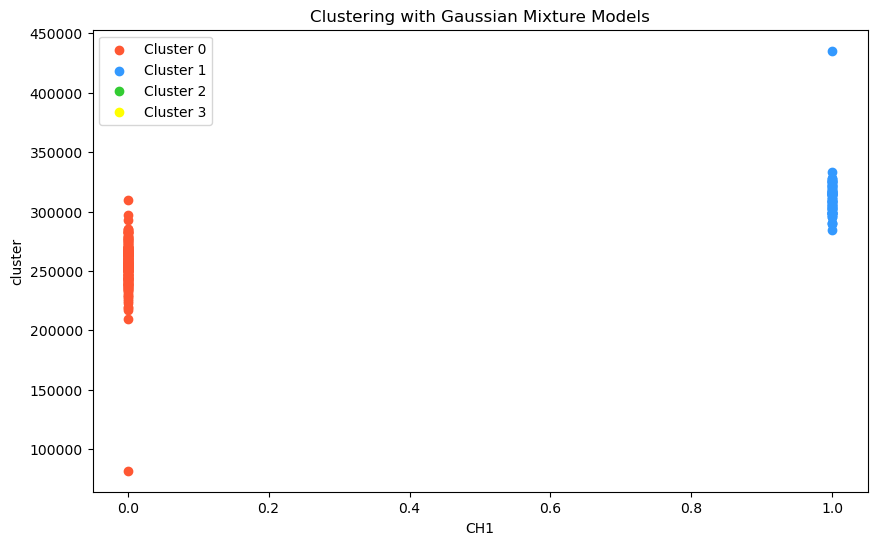

In [5]:
# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
#, '#FFA500', '#800080', '#FFC0CB', '#8B4513', '#808080', '#FFFFFF'
colors = ['#FF5733', '#3399FF', '#33CC33', '#FFFF00']
for cluster in range(4):
    cluster_points = df[df['cluster'] == cluster]
    plt.scatter(cluster_points['cluster'], cluster_points['CH2'], color=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel("CH1" )
plt.ylabel('cluster')
plt.title('Clustering with Gaussian Mixture Models')
plt.legend()
plt.show()

In [21]:
df.corr()

,CH1,CH2,CH3,CH4,cluster
CH1,1.000000,0.880367,0.924794,0.889244,0.356418
CH2,0.880367,1.000000,0.993163,0.999188,0.270034
CH3,0.924794,0.993163,1.000000,0.995584,0.292696
CH4,0.889244,0.999188,0.995584,1.000000,0.275474
cluster,0.356418,0.270034,0.292696,0.275474,1.000000
